# Data Science and Business Analytics

 The Sparks Foundation GRIP August 2021
 

# Author: Nikshita Shetty

# TASK 1: Prediction using Supervised ML

In this task we need to predict the percentage of a student based on the number of study hours.

For this task we will be using Simple Linear Regression

Steps to be performed:
    

# Step 1 : Importing all the required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Shape of the dataset
#no. of rows and no. of columns displayed
s_data.shape

(25, 2)

In [8]:
#Info of the Dataset
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Datatypes
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [19]:
#Checking for Duplicate values in the dataset
data.duplicated().sum()

0

In [17]:
#Checking for Null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2 : Visualizing and Analyzing the Dataset


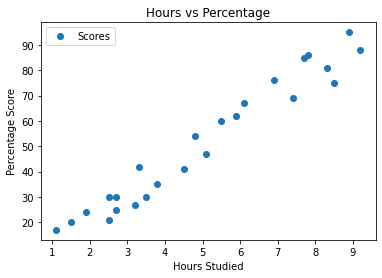

In [18]:
#Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show('block=false')

# Step3: Data Preparation

Divinding the data into "attributes" (inputs) and "labels" (outputs)

In [30]:
X = data.iloc[:, :-1].values   #Attributes
y = data.iloc[:, 1].values     #Labels

print('Data Preparation done Successfully')

Data Preparation done Successfully


In [31]:
# we now split the data into train and test datasets using scikit-learn's built-in train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step4: Training the Algorithm

Now we train the algorithm 

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training is Complete")

Training is Complete


# Step 5 : Visualize the model


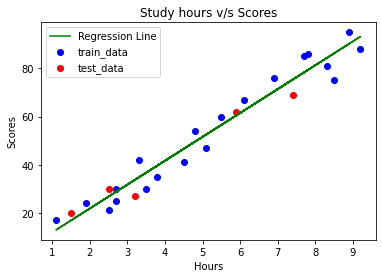

In [33]:
#Plotting the Regression line

line = lr.coef_*X+lr.intercept_

#Plotting for the test data first
plt.scatter(X_train, y_train, label="train_data", color = "b")
plt.scatter(X_test,y_test, label="test_data", color = "r")
plt.title("Study hours v/s Scores")
plt.plot(X, line, color='g', label = 'Regression Line');
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

# Step 6: Making Predictions

In [34]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
#Now comparing Actual v/s Predicted 
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred, 'Varience':y_test-y_pred})
df

,Actual,Predicted,Varience
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


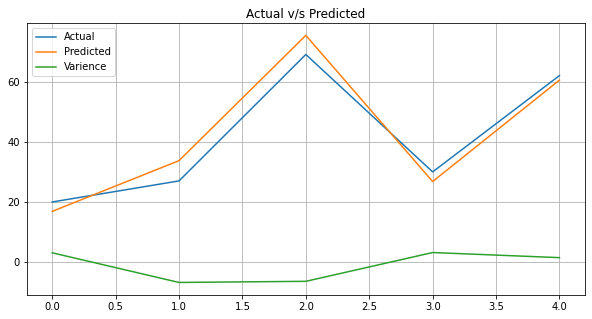

In [26]:
df.plot(kind = 'line', figsize = (10,5), title='Actual v/s Predicted')
plt.grid()
plt.show()

In [36]:
#Testing for Accuracy of Training and Testing sets

print("Training Accuracy: ",lr.score(X_train,y_train))
print("Testing Accuracy: ",lr.score(X_test,y_test))

Training Accuracy:  0.9515510725211553
Testing Accuracy:  0.9454906892105355


In [37]:
hours = 9.25
hr = np.array([hours])
hr = hr.reshape(-1,1)
pred = lr.predict(hr)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


# Step 7: Evaluate the Model

In [40]:
from sklearn import metrics


print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.18385989900298
Mean Squared Error:  21.598769307217413
Root Mean Squared Error:  4.647447612100368
